In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

## Device measurements

We first examine the curent-power relation of the diode laser. 

In [4]:
current = [50,10.03,20.04,30.01,40.05,60.05,70.02,80.02,90.01,100]
current_err = 0.01
power = [16.32,0.0361,0.0819,2.273,9.467,23.51,30.66,37.9,45.2,53.8]
power_err = [0.05,0.0001,0.001,0.003,0.001,0.002,0.01,0.01,0.05,0.05]

Text(0.5, 1.0, 'Power-Current relation of the diode laser')

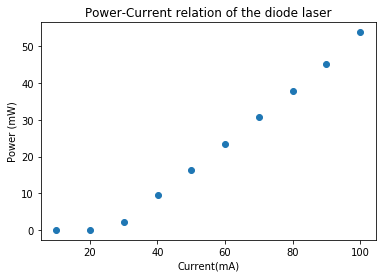

In [15]:
plt.scatter(current, power)
plt.errorbar(current, power,current_err,power_err, fmt = 'none')
plt.xlabel('Current(mA)')
plt.ylabel('Power (mW)')
plt.title('Power-Current relation of the diode laser')

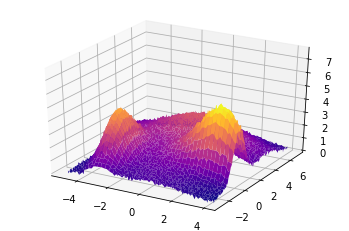

Fitted parameters:
[ 2.97894610e-03  2.00531097e+00  2.51246192e+00  5.39696357e+00
  1.50217192e+00 -9.96917400e-01  4.00086572e+00  5.99935018e+00
  2.49737066e+00  1.79384122e+00 -2.99997234e+00 -5.02877307e-01
 -1.00296570e+00  1.99918551e+00  3.99579306e+00  3.00365522e+00
  4.99129343e-01  2.00552383e+00  9.97704226e-01  4.99945122e+00]
RMS residual = 0.0999973818497572


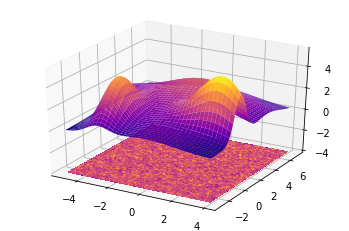

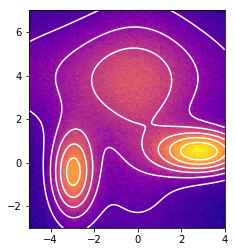

In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The two-dimensional domain of the fit.
xmin, xmax, nx = -5, 4, 75
ymin, ymax, ny = -3, 7, 150
x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def gaussian(x, y, x0, y0, xalpha, yalpha, A):
    return A * np.exp( -((x-x0)/xalpha)**2 -((y-y0)/yalpha)**2)

# A list of the Gaussian parameters: x0, y0, xalpha, yalpha, A
gprms = [(0, 2, 2.5, 5.4, 1.5),
         (-1, 4, 6, 2.5, 1.8),
         (-3, -0.5, 1, 2, 4),
         (3, 0.5, 2, 1, 5)
        ]

# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
noise_sigma = 0.1

# The function to be fit is Z.
Z = np.zeros(X.shape)
for p in gprms:
    Z += gaussian(X, Y, *p)
Z += noise_sigma * np.random.randn(*Z.shape)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_zlim(0,np.max(Z)+2)
plt.show()

# This is the callable that is passed to curve_fit. M is a (2,N) array
# where N is the total number of data points in Z, which will be ravelled
# to one dimension.
def _gaussian(M, *args):
    x, y = M
    arr = np.zeros(x.shape)
    for i in range(len(args)//5):
       arr += gaussian(x, y, *args[i*5:i*5+5])
    return arr

# Initial guesses to the fit parameters.
guess_prms = [(0, 0, 1, 1, 2),
              (-1.5, 5, 5, 1, 3),
              (-4, -1, 1.5, 1.5, 6),
              (4, 1, 1.5, 1.5, 6.5)
             ]
# Flatten the initial guess parameter list.
p0 = [p for prms in guess_prms for p in prms]

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = np.vstack((X.ravel(), Y.ravel()))
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = curve_fit(_gaussian, xdata, Z.ravel(), p0)
fit = np.zeros(Z.shape)
for i in range(len(popt)//5):
    fit += gaussian(X, Y, *popt[i*5:i*5+5])
print('Fitted parameters:')
print(popt)

rms = np.sqrt(np.mean((Z - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fit, cmap='plasma')
cset = ax.contourf(X, Y, Z-fit, zdir='z', offset=-4, cmap='plasma')
ax.set_zlim(-4,np.max(fit))
plt.show()

# Plot the test data as a 2D image and the fit as overlaid contours.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(Z, origin='bottom', cmap='plasma',
          extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(X, Y, fit, colors='w')
plt.show()

In [19]:
np.shape(Z)

(150, 75)